In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df2012 = pd.read_csv(r'C:\Users\Ikshita\Documents\USC_Analysis\USC2012.csv')
df2013 = pd.read_csv(r'C:\Users\Ikshita\Documents\USC_Analysis\USC2013.csv')
df2014 = pd.read_csv(r'C:\Users\Ikshita\Documents\USC_Analysis\USC2014.csv')
df2015 = pd.read_csv(r'C:\Users\Ikshita\Documents\USC_Analysis\USC2015.csv')
df2016 = pd.read_csv(r'C:\Users\Ikshita\Documents\USC_Analysis\USC2016.csv')
df2017 = pd.read_csv(r'C:\Users\Ikshita\Documents\USC_Analysis\USC2017.csv')
# Drop Missing Values (NA)
df2012.dropna(subset=['DateOccuredFrom','TimeOccuredFrom','DateOccuredTo','TimeOccuredTo','datereported','Timereported'], inplace=True)
df2013.dropna(subset=['DateOccuredFrom','TimeOccuredFrom','DateOccuredTo','TimeOccuredTo','datereported','Timereported'], inplace=True)
df2014.dropna(subset=['DateOccuredFrom','TimeOccuredFrom','DateOccuredTo','TimeOccuredTo','datereported','Timereported'], inplace=True)
df2015.dropna(subset=['DateOccuredFrom','TimeOccuredFrom','DateOccuredTo','TimeOccuredTo','datereported','Timereported'], inplace=True)
df2016.dropna(subset=['DateOccuredFrom','TimeOccuredFrom','DateOccuredTo','TimeOccuredTo','datereported','Timereported'], inplace=True)
df2017.dropna(subset=['DateOccuredFrom','TimeOccuredFrom','DateOccuredTo','TimeOccuredTo','datereported','Timereported'], inplace=True)

def crime_category_LA(df):

    if (df['ccClass'] in ('ADMINISTRATIVE' or 'ALARM RESPONSE' or 'DISTURBANCE' or 'EH&S' or 'FIRE' or 'NARCOTICS' or 'PROPERTY' or 'SUICIDE' or 'TRESPASS' or 'WEAPONS' or 'HEALTH & SAFETY')):
               return 'other'
    elif (df['ccClass'] in ('ALCOHOL' or 'CRIMINAL THREATS' or 'DOMESTIC VIOLENCE' or 'HARASSMENT' or 'INCIDENT' or 'OBSCENE ACTIVITY' or 'EXTORTION' or 'HATE INCIDENT')):
               return 'harrassment'
    elif (df['ccClass'] in ('ARSON' or 'VANDALISM')):
               return 'vandalism'
    elif (df['ccClass'] in ('ASSAULT' or 'ASSAULT-OTHER' or 'HOSPITAL' or 'KIDNAPPING')):
               return 'assault'
    elif (df['ccClass'] in 'BATTERY'):
               return 'battery'
    elif (df['ccClass'] in ('BURGLARY' or 'BURGLARY-MOTOR VEHICLE' or 'BURGLARY-OTHER')):
               return 'burglary'
    elif (df['ccClass'] in ('DISORDERLY CONDUCT' or 'HOMELAND SECURITY' or 'DEATH' or 'HOMICIDE')):
               return 'murder'
    elif (df['ccClass'] in ('FRAUD' or 'IDENTITY THEFT' or 'OFFICER STATUS')):
               return 'document'
    elif (df['ccClass'] in ('LA MUNICIPAL CODE' or 'SERVICE' or 'WARRANT' or 'FIELD INTERVIEW' or 'PATROL' or 'OBSERVATION')):
               return 'legal'
    elif (df['ccClass'] in 'ROBBERY'):
               return 'robbery'
    elif (df['ccClass'] in 'SEX OFFENSE'):
               return 'rape'
    elif (df['ccClass'] in ('THEFT-GRAND' or 'THEFT-GRAND AUTO' or 'THEFT-GRAND PERSON' or 'THEFT-MOTOR VEHICLE' or 'THEFT-PETTY' or 'THEFT-ACCESS' or 'THEFT-FRAUD' or 'THEFT-TRICK')):
               return 'theft'
    elif (df['ccClass'] in ('TRAFFIC' or 'VEHICLE CODE')):
               return 'vehicle'
    elif (df['ccClass'] in 'CHILD NEGLECT'):
               return 'child'
    return 'other'

# Add Category
df2012['Crime Cat'] = df2012.apply(crime_category_LA, axis = 1)
df2013['Crime Cat'] = df2013.apply(crime_category_LA, axis = 1)
df2014['Crime Cat'] = df2014.apply(crime_category_LA, axis = 1)
df2015['Crime Cat'] = df2015.apply(crime_category_LA, axis = 1)
df2016['Crime Cat'] = df2016.apply(crime_category_LA, axis = 1)
df2017['Crime Cat'] = df2017.apply(crime_category_LA, axis = 1)


In [226]:
def YearWiseCommonAttributeValuesCount(columnname, nameTODisplay):
    arg = columnname
    #Common Major Crime Categories
    cat2012 = df2012.drop_duplicates([arg])[[arg]]
    cat2013 = df2013.drop_duplicates([arg])[[arg]]
    cat2014 = df2014.drop_duplicates([arg])[[arg]]
    cat2015 = df2015.drop_duplicates([arg])[[arg]]
    cat2016 = df2016.drop_duplicates([arg])[[arg]]
    cat2017 = df2017.drop_duplicates([arg])[[arg]]
    crime_cat = cat2012.merge(cat2013).merge(cat2014).merge(cat2015).merge(cat2016).merge(cat2017)
    cat = crime_cat[arg].tolist()
    #Retrieve those crime records in Year 2012,2013,2014,2015,2016,2017,2018
    cat_perc_2012 = df2012.loc[df2012[arg].isin(cat)][[arg]].groupby([arg])[arg].count().reset_index(name="Count")
    cat_perc_2013 = df2013.loc[df2013[arg].isin(cat)][[arg]].groupby([arg])[arg].count().reset_index(name="Count")
    cat_perc_2014 = df2014.loc[df2014[arg].isin(cat)][[arg]].groupby([arg])[arg].count().reset_index(name="Count")
    cat_perc_2015 = df2015.loc[df2015[arg].isin(cat)][[arg]].groupby([arg])[arg].count().reset_index(name="Count")
    cat_perc_2016 = df2016.loc[df2016[arg].isin(cat)][[arg]].groupby([arg])[arg].count().reset_index(name="Count")
    cat_perc_2017 = df2017.loc[df2017[arg].isin(cat)][[arg]].groupby([arg])[arg].count().reset_index(name="Count")
    #Counts of each crime category per year
    df12_15 = pd.merge( pd.merge(pd.merge(cat_perc_2012, cat_perc_2013, on=arg), cat_perc_2014, on=arg),cat_perc_2015, on=arg)
    df12_17 = pd.merge(pd.merge(df12_15, cat_perc_2016, on=arg), cat_perc_2017, on=arg)
    df12_17.columns = [nameTODisplay, 'Year_2012','Year_2013','Year_2014','Year_2015','Year_2016','Year_2017']
    df12_17['Total'] = df12_17.iloc[:, 1:].sum(1)
    df12_17.sort_values(by=['Total'],ascending = False)
    return df12_17

In [227]:
YearWiseCrimeAnalysis = YearWiseCommonAttributeValuesCount('Crime Cat', 'Crime Category')
YearWiseCrimeAnalysis = YearWiseCrimeAnalysis[YearWiseCrimeAnalysis['Crime Category'] != 'other']
YearWiseCrimeAnalysis

,Crime Category,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Total
0,assault,9,2,5,7,5,13,41
1,battery,37,40,36,42,27,36,218
2,burglary,49,36,32,26,41,36,220
3,document,9,8,11,8,12,14,62
4,harrassment,208,235,232,196,142,222,1235
5,legal,9,22,7,5,6,7,56
6,murder,77,85,71,54,23,39,349
8,rape,10,8,20,41,27,22,128
9,robbery,12,14,5,9,14,8,62
10,theft,142,169,79,88,95,106,679


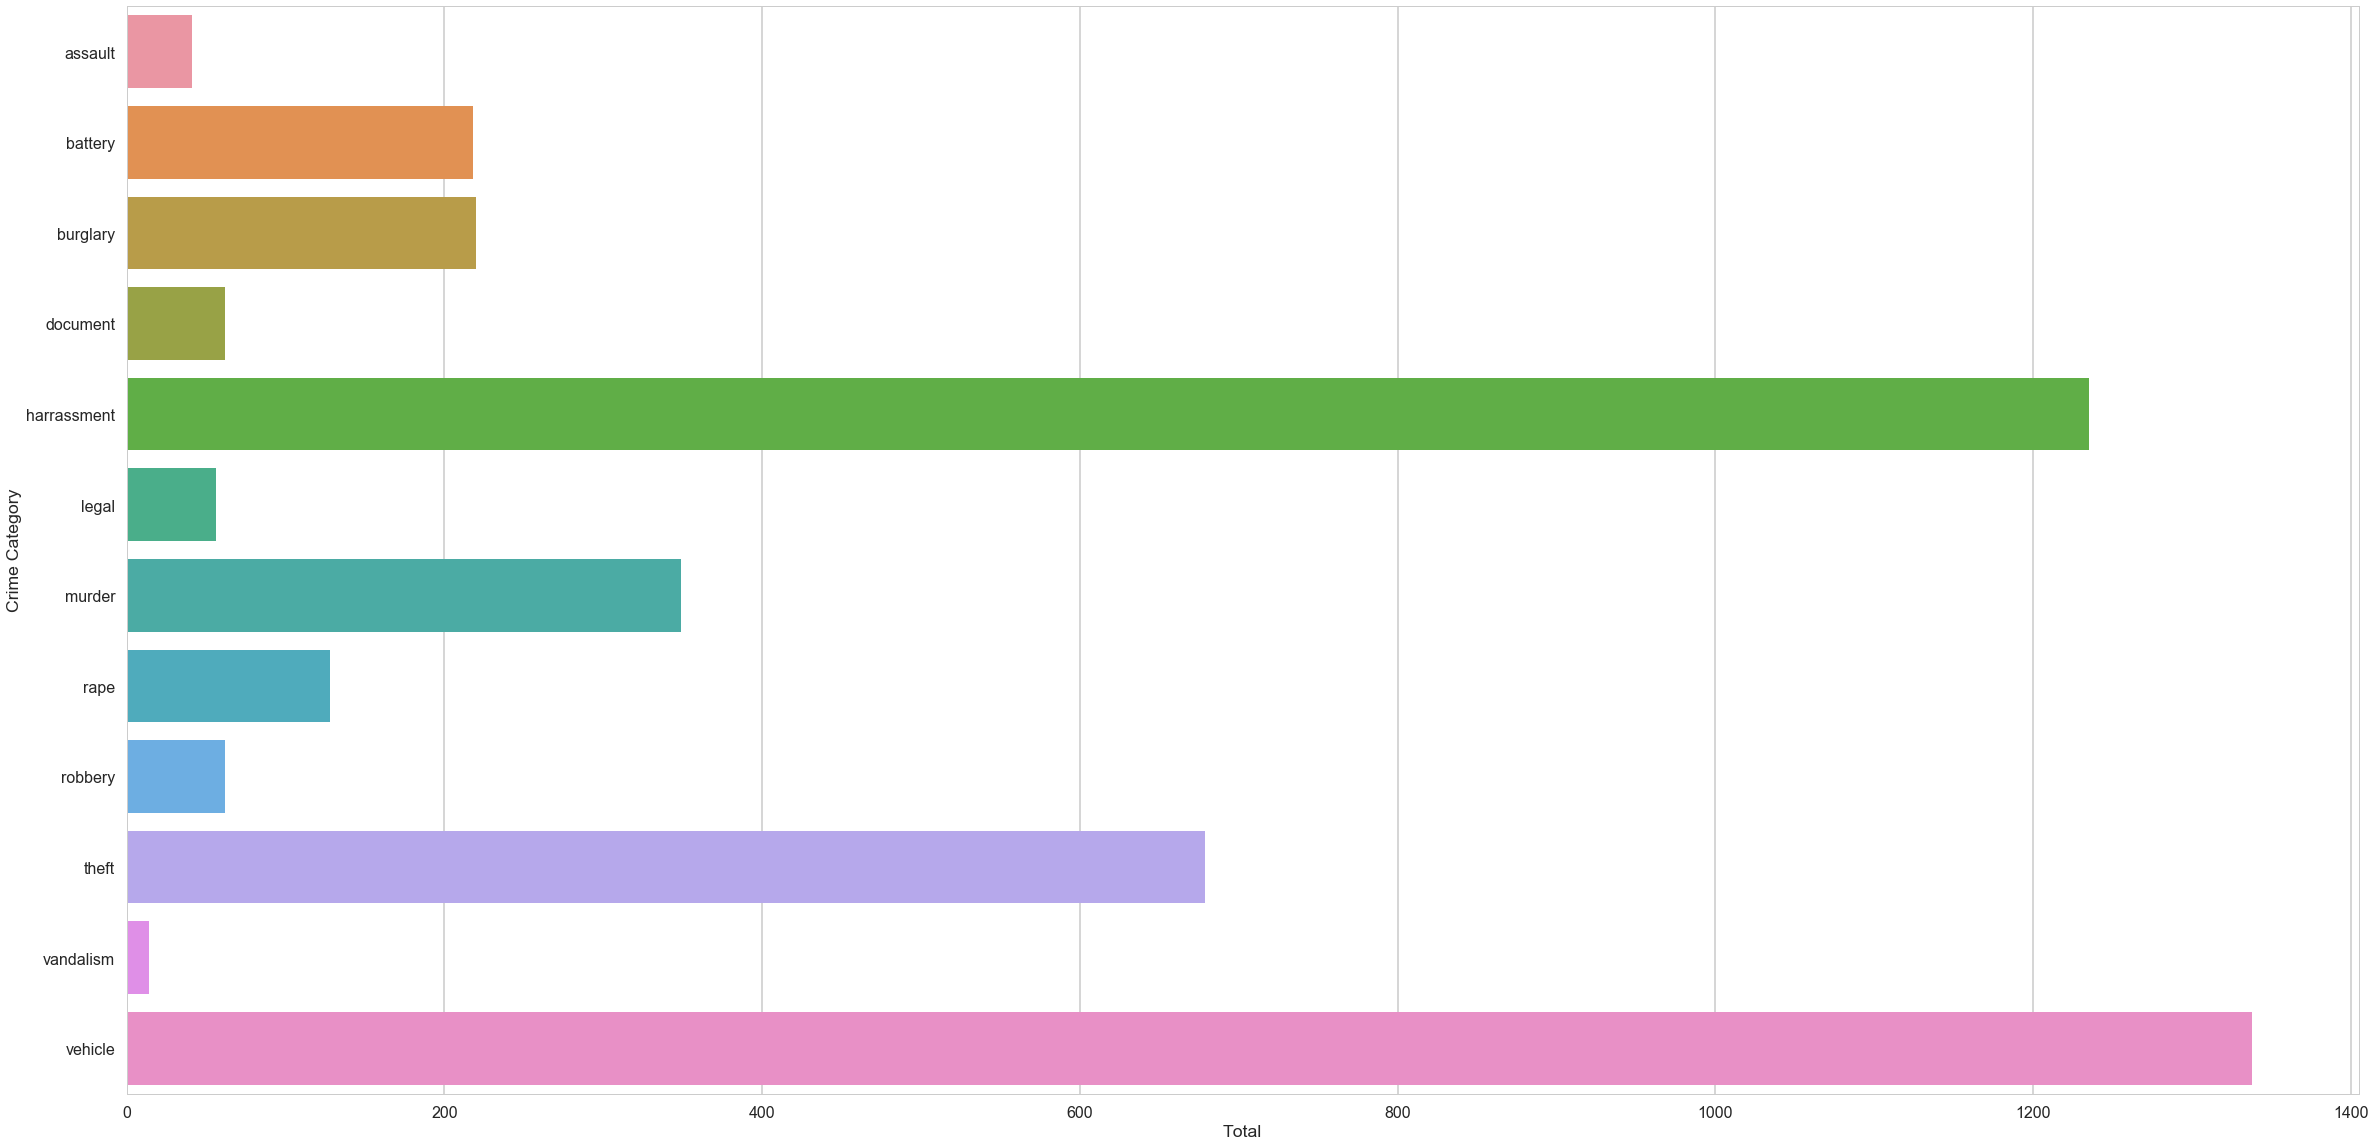

In [230]:
sns.barplot(x="Total", y="Crime Category", data=YearWiseCrimeAnalysis)
plt.savefig('USCCrimeCat(USCvsLA).png')

In [225]:
data = [['Crime',len(df2012),len(df2013),len(df2014),len(df2015),len(df2016),len(df2017)]]
cumulative_crime = pd.DataFrame(data,columns=['','2012','2013','2014','2015','2016','2017'])
cumulative_crime

,,2012,2013,2014,2015,2016,2017
0,Crime,3791,3959,3601,3744,3551,3620


In [134]:
Year_plot = pd.melt(YearWiseCrimeAnalysis, id_vars=['Crime Category'], var_name=['Year'])

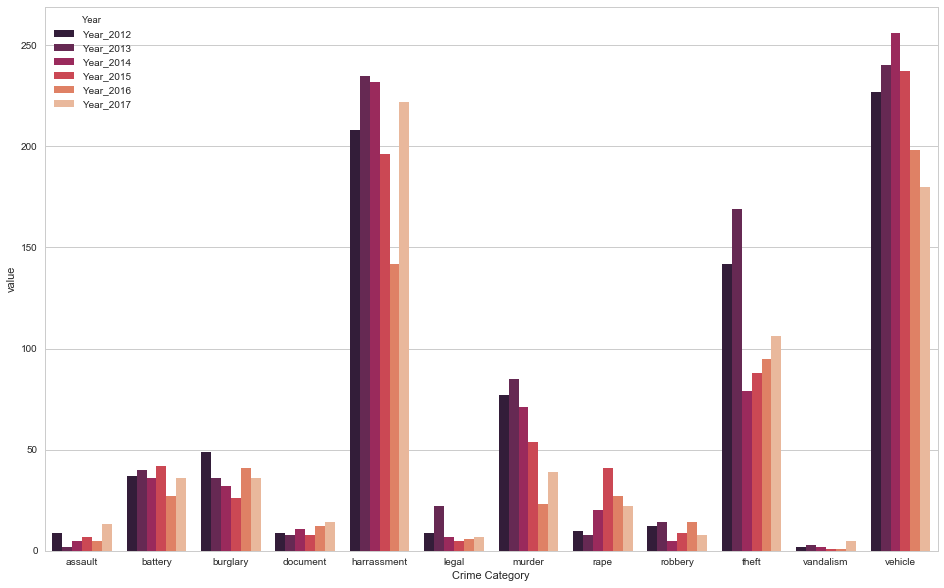

In [218]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="Crime Category", y="value", hue="Year", data=Year_plot,ci="sd",palette="rocket")
sns.set_context("poster")
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig('USCCrimeCat(USCvsLA).png')